In [55]:
# SARTHAK SONI


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('http://bit.ly/w-data')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# EDA
Let's create some simple plots to check out the data!

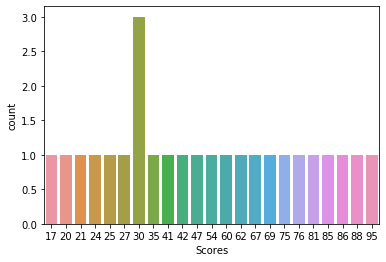

In [6]:
sns.countplot(df['Scores'])

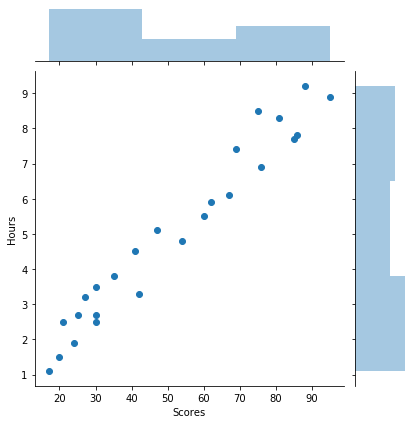

In [7]:
sns.jointplot('Scores','Hours',data=df)

# Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Scores column

In [8]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [50]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Hours vs Scores')

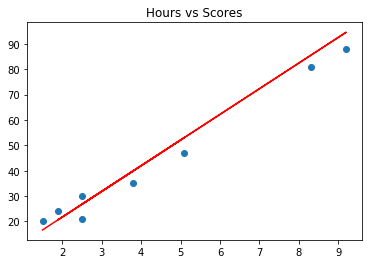

In [51]:
plt.scatter(X_test,y_test)
plt.plot(X_test,predictions,color='red')
plt.title('Hours vs Scores')

In [ ]:
#from the graph we can observe the linear regression 

In [52]:
data=pd.DataFrame({'Actual': y_test,'predict':predictions})
data

,Actual,predict
0,20,16.670980
1,47,53.091534
2,24,20.717709
3,81,85.465360
4,88,94.570498
5,21,26.787801
6,30,26.787801
7,35,39.939668


# Predicting Scores 
Predicting scores of a person who studies for 9.25 hours

In [53]:
score_predict=lm.predict([[9.25]])
print('Number of hours = 9.25')
print('Predicted Scores=',score_predict)

Number of hours = 9.25
Predicted Scores= [95.07633944]


# Model evaluation

In [54]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 23.786333118502377
